In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    w = np.linalg.inv(np.dot(tx.T, tx)).dot(tx.T).dot(y)
    
    e = y - tx.dot(w)
    mse = (1 / 2) * np.mean(e * e)
    
    return mse, w

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [4]:
from helpers import *

import sys
sys.path.insert(1, '../../ex02/template')

from costs import *
from gradient_descent import *
from grid_search import *

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    mse, w = least_squares(y, tx)
    print("Least squares: MSE = {}, w* = {}".format(mse, w))
    
    
    max_iters = 50
    gamma = 0.7
    initial_w = np.array([0, 0])
    losses, ws = gradient_descent(y, tx, initial_w, max_iters, gamma)
    print("Gradient descent: MSE = {}, w* = {}".format(losses[-1], ws[-1]))
    
    num_intervals = 50
    w0, w1 = generate_w(num_intervals)
    losses = grid_search(y, tx, w0, w1)
    loss, w0_star, w1_star = get_best_parameters(w0, w1, losses)
    print("Grid search: MSE = {}, w* = {}".format(loss, np.array([w0_star, w1_star])))

Test it here

In [5]:
test_your_least_squares()

Least squares: MSE = 15.3858878688294, w* = [73.293922   13.47971243]
Gradient Descent(0/49): loss=265.3024621089606, w0=51.30574540147361, w1=9.435798704492274
Gradient Descent(1/49): loss=37.87837955044127, w0=66.69746902191571, w1=12.266538315840002
Gradient Descent(2/49): loss=17.41021212017447, w0=71.31498610804834, w1=13.11576019924433
Gradient Descent(3/49): loss=15.568077051450459, w0=72.70024123388814, w1=13.37052676426563
Gradient Descent(4/49): loss=15.402284895265295, w0=73.11581777164007, w1=13.446956733772023
Gradient Descent(5/49): loss=15.38736360120863, w0=73.24049073296565, w1=13.469885724623941
Gradient Descent(6/49): loss=15.386020684743531, w0=73.27789262136334, w1=13.476764421879516
Gradient Descent(7/49): loss=15.385899822261674, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.385888944638307, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385887965652202, w0=73.29348920882516, w1=13.47963283863509
Gradient 

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [6]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [7]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    N = len(x)
    
    ans = np.ones((degree + 1, N))
    for d in range(1, degree + 1):
        arr = ans[d - 1] * x
        ans[d] = arr
    
    return ans.T
        

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [11]:
from plots import *

# import sys
# sys.path.insert(1, '../../ex02/template')

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        tx = build_poly(x, degree)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        mse, weights = least_squares(y, tx)
        rmse = np.sqrt(2 * mse)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737484
Processing 3th experiment, degree=7, rmse=0.2496587036090789
Processing 4th experiment, degree=12, rmse=0.6412171295874655


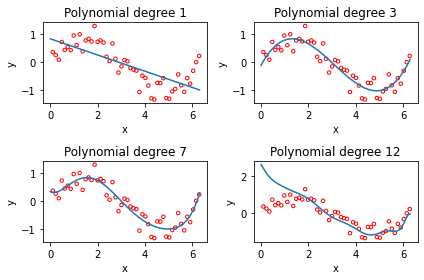

In [12]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [15]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    N = len(x)
    indexes = np.random.permutation(N)
    split = int(ratio * N)
    
    x_train = x[indexes[:split]]
    x_test = x[indexes[split:]]
    
    y_train = y[indexes[:split]]
    y_test = y[indexes[split:]]
    
    return x_train, y_train, x_test, y_test
    
    

Then, test your `split_data` function below.

In [21]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    x_train_poly = build_poly(x_train, degree)
    x_test_poly = build_poly(x_test, degree)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate weight through least square: TODO
    # ***************************************************
    mse_tr, weights = least_squares(y_train, x_train_poly)
    
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
#     mse_tr = compute_loss(y_train, x_train_poly, weights)
    rmse_tr = np.sqrt(2 * mse_tr)
    
    mse_te = compute_loss(y_test, x_test_poly, weights)
    rmse_te = np.sqrt(2 * mse_te)
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [28]:
seed = 56
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.455, Testing RMSE=0.616
proportion=0.9, degree=3, Training RMSE=0.252, Testing RMSE=0.316
proportion=0.9, degree=7, Training RMSE=0.235, Testing RMSE=0.379
proportion=0.9, degree=12, Training RMSE=0.490, Testing RMSE=1.216
proportion=0.5, degree=1, Training RMSE=0.451, Testing RMSE=0.498
proportion=0.5, degree=3, Training RMSE=0.240, Testing RMSE=0.312
proportion=0.5, degree=7, Training RMSE=0.227, Testing RMSE=0.339
proportion=0.5, degree=12, Training RMSE=0.785, Testing RMSE=5.903
proportion=0.1, degree=1, Training RMSE=0.221, Testing RMSE=0.845
proportion=0.1, degree=3, Training RMSE=0.120, Testing RMSE=0.435
proportion=0.1, degree=7, Training RMSE=0.680, Testing RMSE=6.309
proportion=0.1, degree=12, Training RMSE=2.693, Testing RMSE=155.400


# 3 Ridge Regression
Please fill in the function below.

In [25]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    N = len(y)
    dimension = tx.shape[1]
    lambda_prime = 2 * N * lambda_
    
    w = np.linalg.inv(np.dot(tx.T, tx) + lambda_prime * np.eye(dimension)).dot(tx.T).dot(y)
    return w

In [26]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    x_train_poly = build_poly(x_train, degree)
    x_test_poly = build_poly(x_test, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        w = ridge_regression(y_train, x_train_poly, lambda_)
        
        mse_tr = compute_loss(y_train, x_train_poly, w)
        rmse_tr.append(np.sqrt(2 * mse_tr))
        
        mse_te = compute_loss(y_test, x_test_poly, w)
        rmse_te.append(np.sqrt(2 * mse_te))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

#     raise NotImplementedError


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.337
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.336
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.335
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.334
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.229, Testing RMSE=0.329
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.230, Testing RMSE=0.319
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.232, Testing RMSE=0.302
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.237, Testing RMSE=0.283
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.246, Testing RMSE=0.276
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.264, Testing RMSE=0.298
proportion=0.5, degree=7, lambda=0.193, 

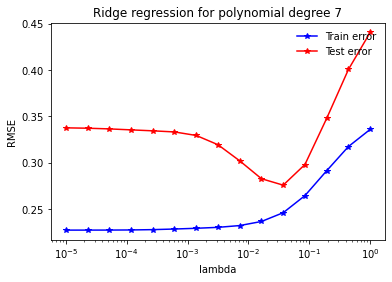

In [27]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)